In [ ]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate

Giriş katmanı

In [ ]:
visible = Input(shape=(64, 64, 1))

Öznitelik çıkarma işlemleri için evrişim katmanı

In [ ]:
#1. evrişim katmanı
conv1 = Conv2D(32, kernel_size = 4, activation = 'relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
flat1 = Flatten()(pool1)

#2. evrişim katmanı
conv2 = Conv2D(16, kernel_size = 8, activation = 'relu')(visible)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat2 = Flatten()(pool2)

#birleştirme katmanı

merge = concatenate([flat1, flat2])

hidden1 = Dense(10, activation='relu')(merge)

#çıkış katmanı

output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs = visible, outputs = output)

# modeli özetle

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 61, 61, 32)   544         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 57, 57, 16)   1040        input_3[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 30, 30, 32)   0           conv2d_1[0][0]                   
____________________________________________________________________________________________

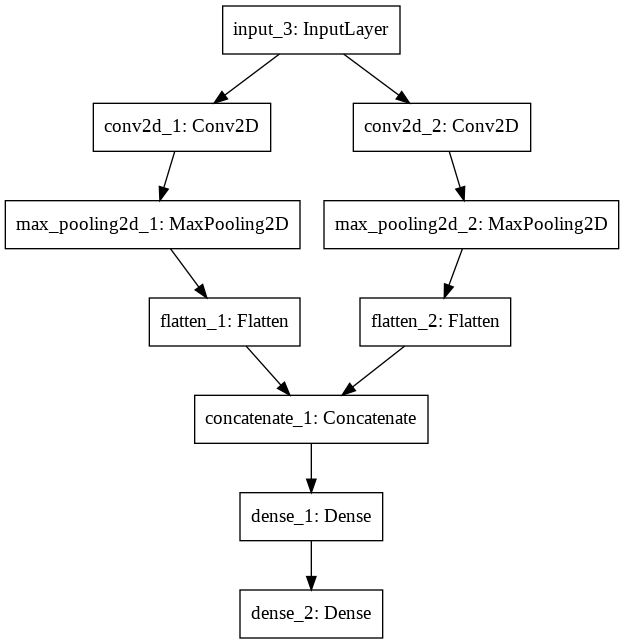

In [ ]:
plot_model(model, to_file='model.png')